In [4]:
import ffn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('aapl,msft', start='2010-01-01')

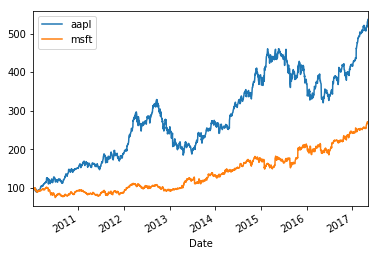

In [6]:
# let's compare the relative performance of each stock
# we will rebase here to get a common starting point for both securities
ax = prices.rebase().plot()

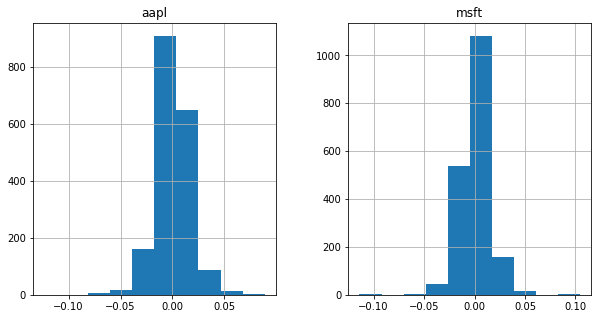

In [7]:
# now what do the return distributions look like?
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(10, 5))

In [8]:
# ok now what about some performance metrics?
stats = prices.calc_stats()
stats.display()

Stat                 aapl        msft
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2017-05-05  2017-05-05
Risk-free rate       0.00%       0.00%

Total Return         437.24%     170.00%
Daily Sharpe         1.02        0.71
Daily Sortino        1.45        1.03
CAGR                 25.77%      14.51%
Max Drawdown         -43.80%     -26.37%
Calmar Ratio         0.59        0.55

MTD                  3.70%       0.79%
3m                   15.90%      9.01%
6m                   37.45%      19.04%
YTD                  29.17%      11.71%
1Y                   62.15%      41.80%
3Y (ann.)            22.51%      23.74%
5Y (ann.)            15.11%      20.94%
10Y (ann.)           25.77%      14.51%
Since Incep. (ann.)  25.77%      14.51%

Daily Sharpe         1.02        0.71
Daily Sortino        1.45        1.03
Daily Mean (ann.)    26.28%      16.14%
Daily Vol (ann.)     25.78%      22.72%
Daily Skew           -0.11       0.07


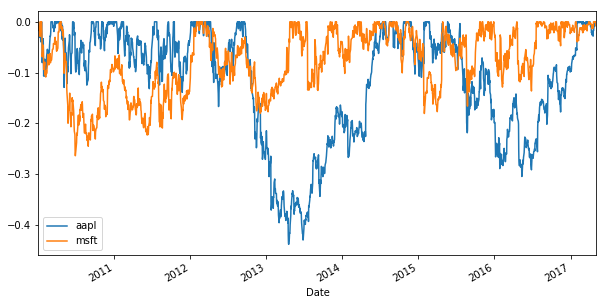

In [9]:
# what about the drawdowns?
ax = stats.prices.to_drawdown_series().plot()

In [11]:
data = ffn.get('agg,hyg,spy,eem,efa', start='2010-01-01', end='2014-01-01')
data.head()

,agg,hyg,spy,eem,efa
Date,,,,,
2010-01-04,84.617724,55.669972,97.788948,37.168330,45.954783
2010-01-05,85.002686,55.934078,98.047805,37.438109,45.995285
2010-01-06,84.953544,56.078710,98.116836,37.516431,46.189701
2010-01-07,84.855254,56.305088,98.531016,37.298869,46.011487
2010-01-08,84.904402,56.393123,98.858904,37.594754,46.376015


In [13]:
ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2010-01-01', end='2014-01-01').head()

,aaplopen,aaplhigh,aapllow,aaplclose
Date,,,,
2010-01-04,213.429998,214.499996,212.380001,214.009998
2010-01-05,214.599998,215.589994,213.249994,214.379993
2010-01-06,214.379993,215.230000,210.750004,210.969995
2010-01-07,211.750000,212.000006,209.050005,210.580000
2010-01-08,210.299994,212.000006,209.060005,211.980005


In [14]:
returns = data.to_log_returns().dropna()
returns.head()

,agg,hyg,spy,eem,efa
Date,,,,,
2010-01-05,0.004539,0.004733,0.002644,0.007232,0.000881
2010-01-06,-0.000578,0.002582,0.000704,0.002090,0.004218
2010-01-07,-0.001158,0.004029,0.004212,-0.005816,-0.003866
2010-01-08,0.000579,0.001562,0.003322,0.007902,0.007891
2010-01-11,-0.000772,-0.000892,0.001396,-0.002086,0.008176


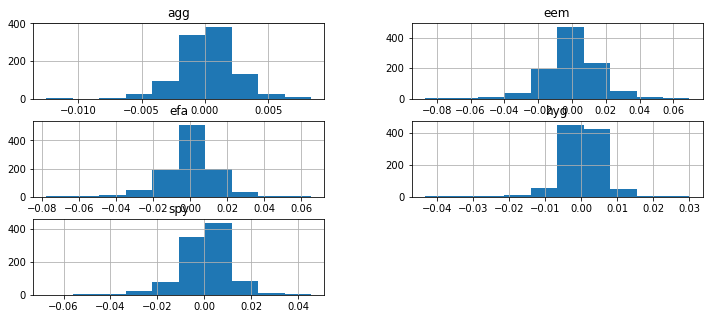

In [15]:
ax = returns.hist(figsize=(12, 5))

In [16]:
returns.corr().as_format('.2f')

,agg,hyg,spy,eem,efa
agg,1.00,-0.12,-0.33,-0.23,-0.29
hyg,-0.12,1.00,0.77,0.75,0.76
spy,-0.33,0.77,1.00,0.88,0.92
eem,-0.23,0.75,0.88,1.00,0.90
efa,-0.29,0.76,0.92,0.90,1.00


<module 'matplotlib.pyplot' from 'C:\\Users\\alexb\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

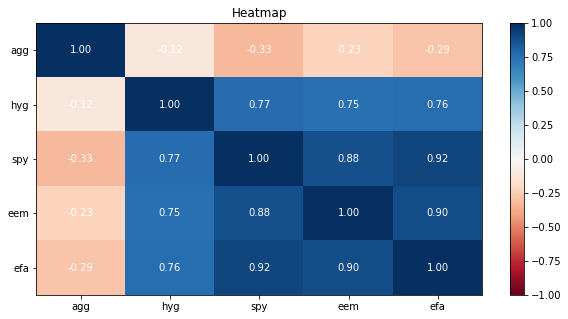

In [17]:
returns.plot_corr_heatmap()

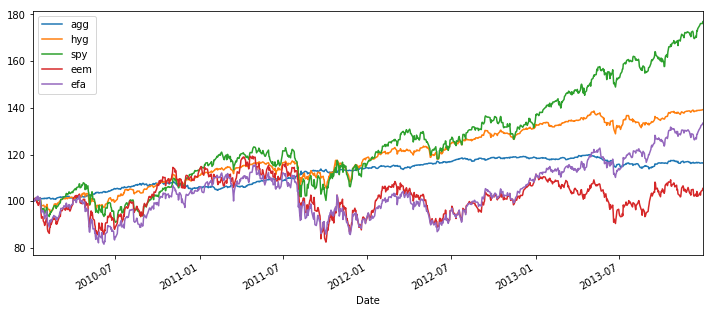

In [18]:
ax = data.rebase().plot(figsize=(12,5))

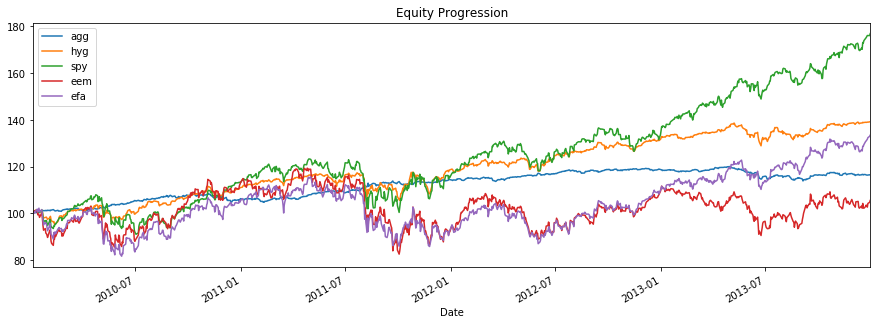

In [20]:
perf = data.calc_stats()
perf.plot()

In [22]:
perf.display()

Stat                 agg         hyg         spy         eem         efa
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2010-01-04  2010-01-04  2010-01-04  2010-01-04  2010-01-04
End                  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         16.36%      39.22%      76.92%      5.46%       33.43%
Daily Sharpe         1.11        0.97        0.93        0.18        0.44
Daily Sortino        1.59        1.18        1.19        0.25        0.58
CAGR                 3.87%       8.65%       15.37%      1.34%       7.50%
Max Drawdown         -5.14%      -10.06%     -18.61%     -30.87%     -25.86%
Calmar Ratio         0.75        0.86        0.83        0.04        0.29

MTD                  -0.56%      0.41%       2.59%       -0.41%      2.18%
3m                   0.02%       3.42%       10.52%      3.48%       6.08%
6m        

In [23]:
# we can also use perf[2] in this case
perf['spy'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010  -5.24   3.12   6.09   1.55  -7.95  -5.17   6.83  -4.5    8.96   3.82   0      6.69  13.14
  2011   2.33   3.47   0.01   2.9   -1.12  -1.69  -2     -5.5   -6.94  10.91  -0.41   1.04   1.89
  2012   4.64   4.34   3.22  -0.67  -6.01   4.06   1.18   2.51   2.54  -1.82   0.57   0.89  15.99
  2013   5.12   1.28   3.8    1.92   2.36  -1.33   5.17  -3      3.16   4.63   2.96   2.59  32.31


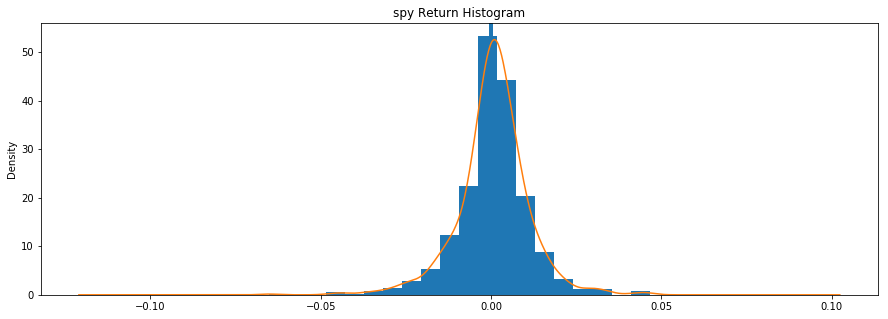

In [24]:
perf[2].plot_histogram()

In [25]:
perf['spy'].stats

start                    2010-01-04 00:00:00
end                      2013-12-31 00:00:00
rf                                         0
total_return                        0.769155
daily_sharpe                         0.93439
daily_sortino                          1.191
cagr                                 0.15375
max_drawdown                       -0.186055
calmar                              0.826368
mtd                                0.0259265
three_month                         0.105248
six_month                           0.163183
ytd                                 0.323078
three_year                          0.160661
daily_mean                          0.157279
daily_vol                           0.168323
daily_skew                          -0.38878
daily_kurt                           4.02849
best_day                           0.0464992
worst_day                         -0.0651232
monthly_sharpe                       1.22106
monthly_sortino                      1.95091
monthly_me